# Train and test an SVM

## Import boilerplate and setup

In [1]:
# first, change the working directory, if needed
import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
os.getcwd()

'/mnt/c/Users/aryam/Documents/school/2020/spring/cse283/BloodBrainClassifier'

In [2]:
# now, import whatever else we need
import sklearn
import pandas as pd
from sklearn.svm import SVC
import scripts.starter as data
data.split(test_size=0.2)
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Train SVC model

In [3]:
clf = make_pipeline(StandardScaler(), SVC(kernel='poly', C=.001,gamma=.001))
clf.fit(data.X_train, data.y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=0.001, kernel='linear'))])

## Test SVC model

In [4]:
y_pred = clf.predict(data.X_test)

## Evaluate the model's performance

In [5]:
clf.score(data.X_test, data.y_test)

0.5652173913043478

In [6]:
# lol, that's pretty terrible
# TODO: improve the model

In [7]:
data.y_train

sample
AD_13_03_1    1
N_3_06_1      0
AD_14_07_1    1
AD_3_03_1     1
N_9_12_1      0
             ..
AD_5_13_1     1
AD_10_09_1    1
AD_14_05_1    1
AD_11_04_1    1
N_2_06_1      0
Name: group, Length: 92, dtype: int64

In [8]:
1/(92 * 60675)

1.791440497303882e-07

In [9]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [10]:
clf.decision_function(data.X_test)

array([0.39523527, 0.33504516, 0.64977793, 0.5276664 , 0.33282062,
       0.27220761, 0.41551379, 0.43306217, 0.33563539, 0.31781105,
       0.18193156, 0.31195738, 0.3299355 , 0.36373248, 0.4172419 ,
       0.44058624, 0.31922015, 0.48382444, 0.39791461, 0.28122753,
       0.32780783, 0.18093743, 0.34657089])

In [11]:
from sklearn.decomposition import PCA

<AxesSubplot:xlabel='0', ylabel='1'>

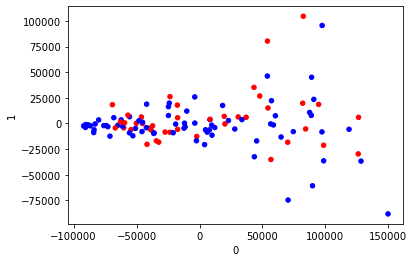

In [12]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(data.data.loc[:,data.data.columns != 'group'])
pd.DataFrame(X_new).plot.scatter(x=0, y=1, color=['blue' if x else 'red' for x in data.data.group])

In [13]:
X = data.data.loc[:,data.data.columns != 'group']
y = data.data['group']
from sklearn.model_selection import cross_val_score
sklearn.model_selection.cross_val_score(clf, X, y, cv=10)

array([0.5       , 0.66666667, 0.58333333, 0.58333333, 0.5       ,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364])

In [14]:
data.y

sample
AD_8_12_1     1
AD_11_08_1    1
AD_11_10_1    1
N_1_01_1      0
N_1_05_1      0
             ..
AD_2_01_1     1
AD_2_02_1     1
AD_2_03_1     1
AD_2_05_1     1
AD_2_07_1     1
Name: group, Length: 115, dtype: int64

In [15]:
X, y, X_train, y_train, X_test, y_test = data.X, data.y, data.X_train, data.y_train, data.X_test, data.y_test

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-7, 1e-8, 1e-10], 'C': [1, 0.000001], 'degree':[5, 6, 7, 8, 9]},
                    {'kernel': ['rbf'], 'gamma': [1e-3], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/home/amassarat/miniconda3/envs/BloodBrainClassifier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amassarat/miniconda3/envs/BloodBrainClassifier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amassarat/miniconda3/envs/BloodBrainClassifier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Best parameters set found on development set:

{'C': 1e-06, 'degree': 5, 'gamma': 1e-08, 'kernel': 'poly'}

Grid scores on development set:

0.638 (+/-0.107) for {'C': 1, 'degree': 5, 'gamma': 1e-07, 'kernel': 'poly'}
0.638 (+/-0.107) for {'C': 1, 'degree': 5, 'gamma': 1e-08, 'kernel': 'poly'}
0.449 (+/-0.221) for {'C': 1, 'degree': 5, 'gamma': 1e-10, 'kernel': 'poly'}
0.661 (+/-0.165) for {'C': 1, 'degree': 6, 'gamma': 1e-07, 'kernel': 'poly'}
0.661 (+/-0.165) for {'C': 1, 'degree': 6, 'gamma': 1e-08, 'kernel': 'poly'}
0.392 (+/-0.184) for {'C': 1, 'degree': 6, 'gamma': 1e-10, 'kernel': 'poly'}
0.667 (+/-0.148) for {'C': 1, 'degree': 7, 'gamma': 1e-07, 'kernel': 'poly'}
0.667 (+/-0.148) for {'C': 1, 'degree': 7, 'gamma': 1e-08, 'kernel': 'poly'}
0.446 (+/-0.226) for {'C': 1, 'degree': 7, 'gamma': 1e-10, 'kernel': 'poly'}
0.663 (+/-0.161) for {'C': 1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
0.663 (+/-0.161) for {'C': 1, 'degree': 8, 'gamma': 1e-08, 'kernel': 'poly'}
0.489 (+/-0.